## Importation des bibliothèques nécessaires et du dataset

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/CO2_Emissions_Canada.csv')
df.info()

#Ajout d'un thème
sns.set_theme()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Problématique : Quels sont les véhicules les plus polluants au Canada ?

## Consommation de carburant en fonction du nombres de cylindres du véhicule

<AxesSubplot:xlabel='Fuel Consumption Comb (mpg)', ylabel='Cylinders'>

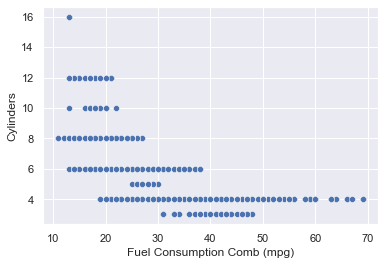

In [52]:
# Consommation de carburant en L/100 km

sns.scatterplot(x="Fuel Consumption Comb (mpg)", y="Cylinders", data= df)

# Le véhicule ayant le plus de cylindres consommera moins de carburant par litre sur 100 km.

## Taux de pollution en fonction du carburant utilisé

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Type'>

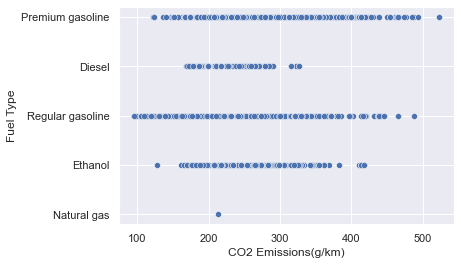

In [47]:
# CO2 Emissions en g/km

df["Fuel Type"] = df["Fuel Type"].replace(to_replace = ["Z", "D", "X", "E", "N"], value=["Premium gasoline","Diesel","Regular gasoline","Ethanol","Natural gas"])
sns.scatterplot(x="CO2 Emissions(g/km)", y="Fuel Type", data= df)

# Les véhicules les plus polluants sont les véhicules utilisant du gasoil premium, gasoil ordinaire et l'éthanol.

## Taux de pollution par rapport aux nombres de cylindres du véhicule

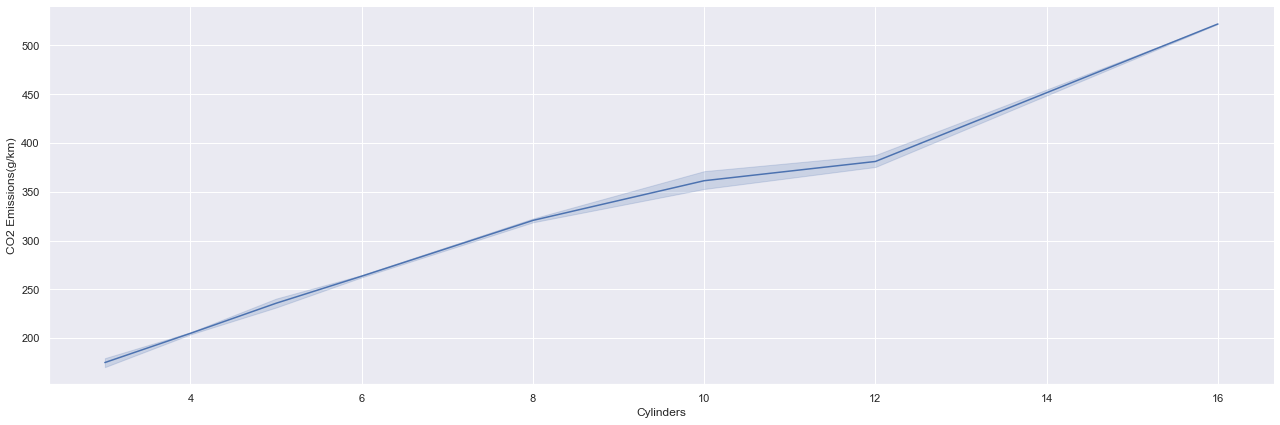

In [53]:
# CO2 Emissions en g/km

sns.relplot(x="Cylinders", y="CO2 Emissions(g/km)",data=df,kind="line").fig.set_size_inches(20,6)
plt.show()

# Plus le véhicule aura de cylindres plus il sera polluant.